In [1]:
import findspark
findspark.init()

In [2]:
import sys
import time
import json
import os

from pyspark import SparkConf, SparkContext, StorageLevel

In [3]:
import importlib

In [4]:
import task2support

In [5]:
importlib.reload(task2support)

<module 'task2support' from '/Users/markduan/duan/USC_course/USC_APDS/INF553/homework/hw4/python/task2/task2support.py'>

In [6]:
conf = SparkConf() \
    .setAppName("task2") \
    .setMaster("local[*]") \
    .set("spark.driver.memory","4g")
sc = SparkContext(conf=conf)
sc.setLogLevel("ERROR")

In [7]:
"""
spark-submit task2.py <filter_threshold> <input_file_path> <betweenness_output_file_path> <community_output_file_path>
"""
filter_threshold = 7
input_file_path = "file:///Users/markduan/duan/USC_course/USC_APDS/INF553/homework/hw4/data/ub_sample_data.csv"
betweenness_output_file_path = "./output/betweenness_jupyter.txt"
community_output_file_path = "./output/community_jupyter.txt"

In [8]:
data_with_header = sc.textFile(input_file_path)
header = data_with_header.first()
distinct_data = data_with_header.filter(lambda l: l != header) \
    .map(lambda l: tuple(l.split(','))) \
    .distinct()\
    .persist(StorageLevel.MEMORY_AND_DISK)
# distinct_data: RDD - [(uid, bid), ...]

In [9]:
uid_map_table = distinct_data.map(lambda x: x[0]).distinct().collect()
bid_map_table = distinct_data.map(lambda x: x[1]).distinct().collect()

In [10]:
baskets = distinct_data.map(lambda x: (uid_map_table.index(x[0]), bid_map_table.index(x[1])))\
    .map(lambda x: (x[0], [x[1]])) \
    .reduceByKey(lambda x, y: x + y) \
    .collectAsMap()

In [11]:
uids = sorted(list(baskets.keys()))

In [12]:
uids_length = len(uids)

In [13]:
edges_list = []
vertices_have_link = set([])
for i in range(uids_length):
    uid1 = uids[i]
    set1 = set(baskets[uid1])
    for j in range(i+1, uids_length):
        uid2 = uids[j]
        set2 = set(baskets[uid2])
        if len(set1.intersection(set2)) >= filter_threshold:
            edges_list.append((uid1, uid2, 1))
            vertices_have_link.add(uid1)
            vertices_have_link.add(uid2)

In [14]:
len(vertices_have_link)

222

In [15]:
g = task2support.UndirectedGraph(vertices=vertices_have_link, edges=edges_list)

In [16]:
optimal_groups = g.getOptimalClustersBasedOnModularity()

In [17]:
len(optimal_groups)

19

In [18]:
optimal_groups

[[0,
  5,
  10,
  14,
  16,
  19,
  20,
  23,
  28,
  29,
  30,
  32,
  44,
  59,
  108,
  125,
  215,
  221,
  246,
  1,
  22,
  25,
  27,
  33,
  60,
  66,
  67,
  73,
  82,
  109,
  189,
  204,
  245,
  248,
  260,
  614,
  678,
  861,
  336,
  4,
  102,
  146,
  505,
  662,
  275,
  550,
  673,
  7,
  282,
  21,
  68,
  84,
  142,
  148,
  250,
  322,
  346,
  363,
  496,
  497,
  549,
  606,
  617,
  701,
  702,
  1112,
  1136,
  1248,
  1573,
  1603,
  735,
  1829,
  72,
  91,
  508,
  36,
  1333],
 [2, 6, 213, 38],
 [3,
  12,
  18,
  26,
  37,
  39,
  41,
  42,
  46,
  50,
  52,
  100,
  111,
  121,
  174,
  192,
  233,
  235,
  277,
  332,
  389,
  463,
  825,
  910,
  71,
  81,
  326,
  320,
  445,
  75,
  120,
  170,
  197,
  1230,
  293,
  43,
  218,
  303,
  573,
  1150,
  88,
  350,
  804,
  137,
  190,
  399],
 [8, 114, 1644, 2635],
 [1547, 626, 1371, 1851, 1814, 1863, 1890, 3152, 3163, 3164, 3165],
 [1551,
  588,
  869,
  1080,
  1083,
  1366,
  1376,
  1444,
  1534,
  1

In [19]:
for group in optimal_groups:
    for i in range(len(group)):
        group[i] = uid_map_table[group[i]]

In [21]:
for r in optimal_groups:
    print(r)

['39FT2Ui8KUXwmUt6hnwy-g', 'bSUS0YcvS7UelmHvCzNWBA', 'DKolrsBSwMTpTJL22dqJRQ', 'sdLns7062kz3Ur_b8wgeYw', '_VTEyUzzH92X3w-IpGaXVA', 'qtOCfMTrozmUSHWIcohc6Q', 'zBi_JWB5uUdVuz3JLoAxGQ', 'KLB3wIYUwKDPMbijIE92vg', '1KQi8Ymatd4ySAd4fhSfaw', '_Pn-EmWO-pFPFg81ZIEiDw', 'dTeSvET2SR5LDF_J07wJAQ', 'ay4M5J28kBUf0odOQct0BA', 'OoyQYSeYNyRVOmdO3tsxYA', 'PE8s8ACYABRNANI-T_WmzA', '79yaBDbLASfIdB-C2c8DzA', 'R4l3ONHzGBakKKNo4TN9iQ', 'bHufZ2OTlC-OUxBDRXxViw', 'ChshgCKJTdIDg17JKtFuJw', 'B0ENvYKQdNNr1Izd2r-BAA', '0FVcoJko1kfZCrJRfssfIA', '4pc_EyanaC3ARh0MZZyouA', '2XYdguaaZ7dgi6fAlddujg', 'bE7Yd0jI_P6g27MWEKKalA', 'sBqCpEUn0qYdpSF4DbWlAQ', '7RCz4Ln_FaTvNrdwe251Dg', 'y6jsaAXFstAJkf53R4_y4Q', 'tL2pS5UOmN6aAOi3Z-qFGg', 'dW6bAWM1HbPdk_cGS_a2HA', 'CebjpVd3PsofCgotWp60pg', '2quguRdKBzul3GpRi9e1mA', 'T88y73qdOSutuvzLlhWtqQ', 'DkLSyxogCcJXY5DbTZ-f2A', 'WoKCLSctS7G2547xKcED-Q', 'bJguBxPlnTW29tRTAF0nkQ', 'tRZAC_H5RHrjvyvtufcNXQ', 'KtE55izPs1ubJn3ofF2IrA', 'hqmnMdDS-Opjp3BfBJA8qA', '4PQhC-zTQ4ACEN0-r39JuQ', 'hd343st7cO

In [24]:
def rearrageCommunity(communities):
    for item in communities:
        item.sort()
    communities.sort(key=lambda x: x[0])
    communities.sort(key=lambda x: len(x))
    return communities

In [25]:
res = rearrageCommunity(optimal_groups)

In [26]:
for r in res:
    print(r)

['23y0Nv9FFWn_3UWudpnFMA', 'eqWEgMH-DCP74i82BEAZzw']
['3Vd_ATdvvuVVgn_YCpz8fw', 'jSbXY_rno4hYHQCFftsWXg']
['453V8MlGr8y61PpsDAFjKQ', 'gH0dJQhyKUOVCKQA6sqAnw']
['46HhzhpBfTdTSB5ceTx_Og', 'YVQFzWm0H72mLUh-8gzd5w']
['F47atsRPw-KHmRVk5exBFw', 'JeOHA8tW7gr-FDYOcPJoeA']
['Si3aMsOVGSVlsc54iuiPwA', 'd5WLqmTMvmL7-RmUDVKqqQ']
['_m1ot2zZetDgjerAD2Sidg', 'vENR70IrUsDNTDebbuxyQA']
['gUu0uaiU7UEUVIgCdnqPVQ', 'jJDUCuPwVqwjbth3s92whA']
['98rLDXbloLXekGjieuQSlA', 'MJ0Wphhko2-LbJ0uZ5XyQA', 'QYKexxaOJQlseGWmc6soRg']
['9W73B44Iw8WslrTNB2CdCg', 'UmTMCfPlhA6kJLAsLycSfg', 'Uo5dPwoDpYBzOnmUnjxJ6A']
['CLbpPUqP6XpeAfoqScGaJQ', 'drTMOo4p8nL0pnMNEyat2A', 'tX0r-C9BaHYEolRUfufTsQ', 'xhlcoVm3FOKcxZ0phkdO6Q']
['Gr-MqCunME2K_KmsAwjpTA', 'QRsuZ_LqrRU65dTs5CL4Lw', '_6Zg4ukwS0kst9UtkfVw3w', 'lJFBgSAccsMGwIjfD7LMeQ']
['Cf0chERnfd06ltnN45xLNQ', 'CyrRjt_7iJ8_lSHeH1_TlA', 'JhFK9D3LYl23Se3x4oPUxA', 'ZW-XoteNlRuuK-19q1spmw', 'lL-wNa0TKK6LXrlcVmjYrQ']
['EY8h9IJimXDNbPXVFpYF3A', 'LiNx18WUre9WFCEQlUhtKA', 'hilL60vuuh06sMxs6Ckkog'

In [27]:
len(res)

19

In [28]:
def outputAsFile(res):
    with open(community_output_file_path, 'w', encoding='utf-8') as fp:
        for t in res:
            if len(t) == 1:
                fp.write("'%s'\n" % (t[0]))
            else:
                fp.write("'" + ("', '").join(t) + "'\n")

In [38]:
# outputAsFile(res)    

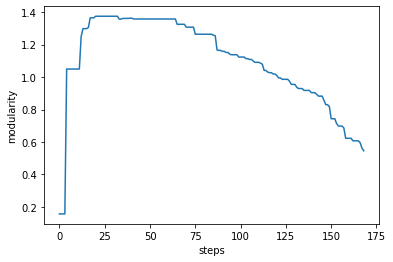

In [22]:
import numpy as np 
from matplotlib import pyplot as plt 
 
x = np.array(list(range(len(visual))))
y = np.array(visual)
# plt.title("Matplotlib demo") 
plt.xlabel("steps") 
plt.ylabel("modularity") 
plt.plot(x, y) 
plt.show()